In [8]:
from scipy import stats as st
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import pandas as pd
from IPython.display import Image  
import pydotplus
from six import StringIO
from sklearn.tree import export_graphviz
import os
 
os.environ["PATH"] += os.pathsep + '/opt/homebrew/Cellar/graphviz/2.47.3/bin/'

In [9]:
survey_raw = pd.read_csv("Raw_survey_data.csv")
survey_raw["dummy"] = [1]*1600
survey_raw = survey_raw.rename(columns = {'q4':'LOIF','q5':'LOIM','q8':'LOIT','q17':'House_Status','q18':'Household_Status','q19':'Grocery_Budget_Strictness','Age_Catagory' : 'Age_Category'},errors="raise")


In [10]:
survey_raw.head()

,№,Prefecture_code,TypeOfRes,Sex,Age,Age_Category,Sex_Era,Married,Profession,f1,...,q13_10,q14,q15t,q16t,House_Status,q17_7t,Household_Status,q18_7t,Grocery_Budget_Strictness,dummy
0,1,11,3,2,24,2,10,1,6,2,...,4,2,江戸,鉄腕DASH,4,NaN,2,NaN,6,1
1,2,12,3,1,32,3,3,2,1,1,...,3,2,魚,魚,4,NaN,4,NaN,2,1
2,3,13,3,1,37,3,3,2,1,1,...,5,3,魚介類が豊富に取れること,テレビで特集が組まれていた時,1,NaN,4,NaN,4,1
3,4,13,3,1,46,4,4,2,3,1,...,5,1,ゆたかさ,家から近い,4,NaN,4,NaN,6,1
4,5,12,3,1,22,2,2,1,1,1,...,3,2,アサリ,地図を見たとき,4,NaN,2,NaN,6,1


In [11]:
feature_cols_Market = ["Age_Category","Grocery_Budget_Strictness"]
x = survey_raw[feature_cols_Market]
y = survey_raw["LOIM"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [13]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.35208333333333336


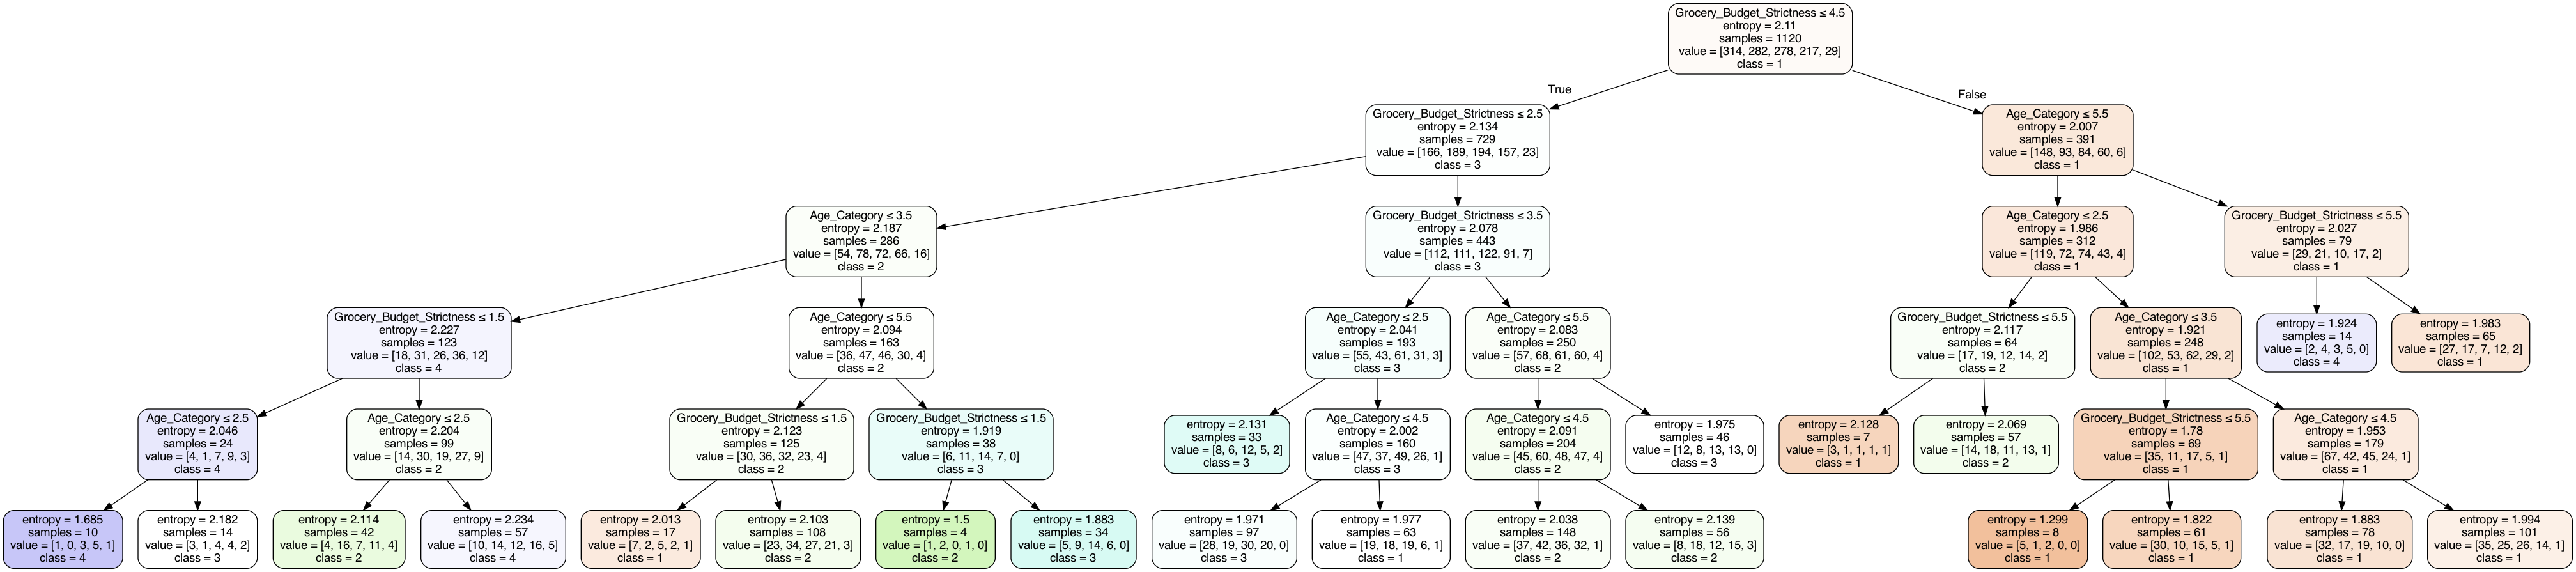

In [198]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols_Market,class_names=['1','2','3','4','5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('market_dct.png')
Image(graph.create_png())

In [199]:
feature_cols_Timeline = ["Age_Category","Grocery_Budget_Strictness"]
x = survey_raw[feature_cols_Timeline]
y = survey_raw["LOIT"]

In [200]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [201]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [202]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.32708333333333334


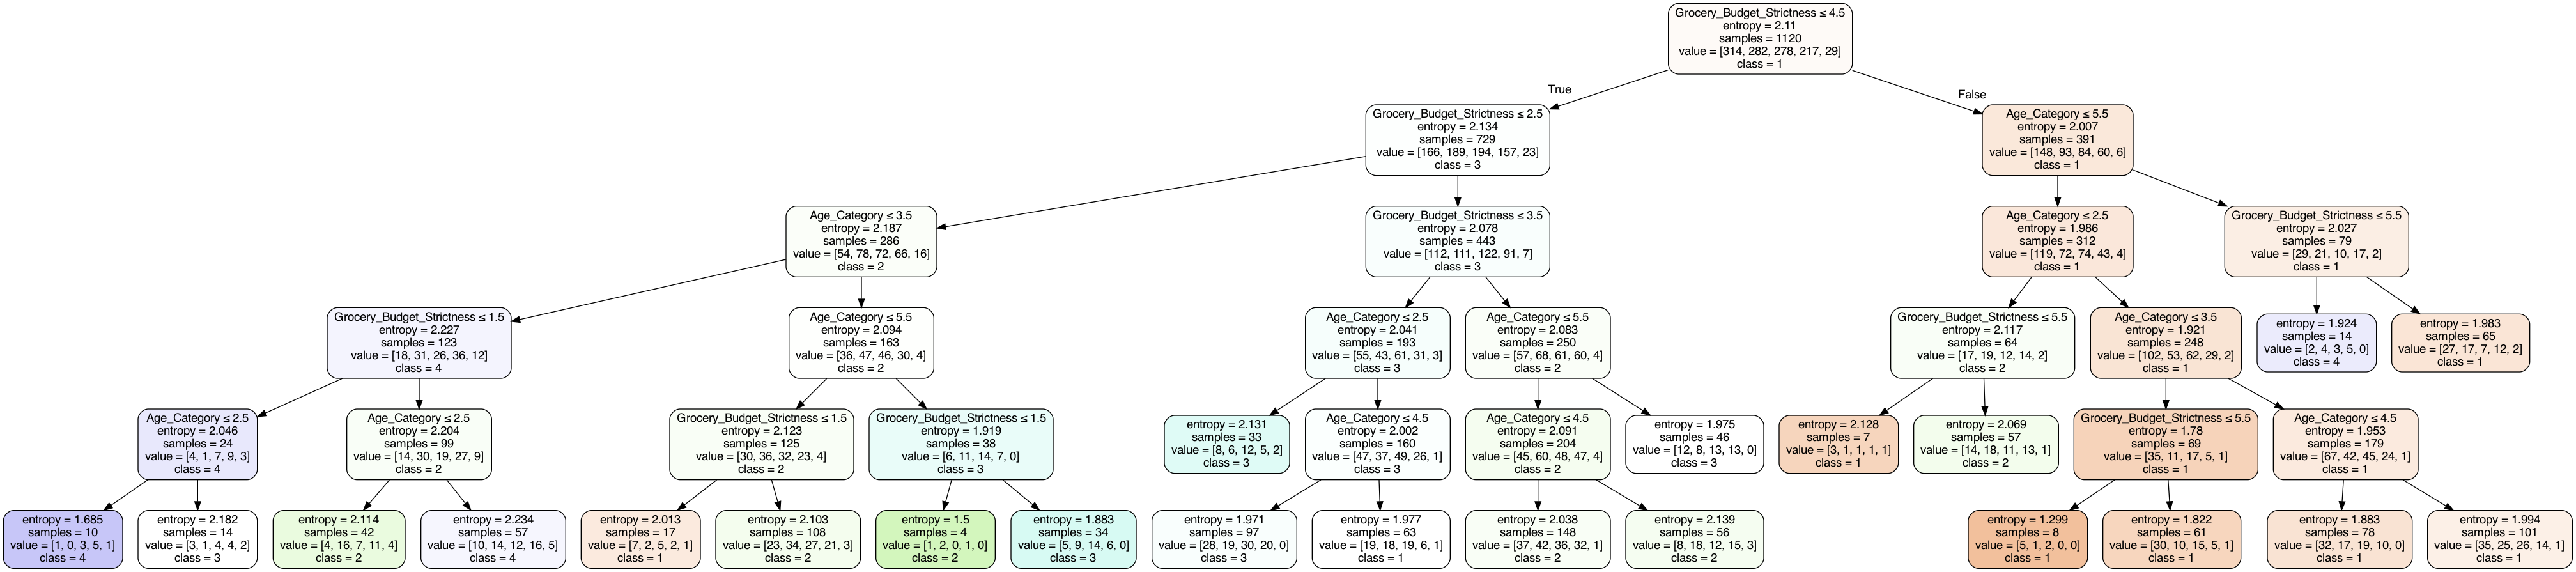

In [203]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols_Timeline,class_names=['1','2','3','4','5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('timeline_dct.png')
Image(graph.create_png())

In [204]:
feature_cols_Farming = ["Sex","Grocery_Budget_Strictness","Prefecture_code"]
x = survey_raw[feature_cols_Farming]
y = survey_raw["LOIF"]

In [205]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [206]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [207]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.30416666666666664


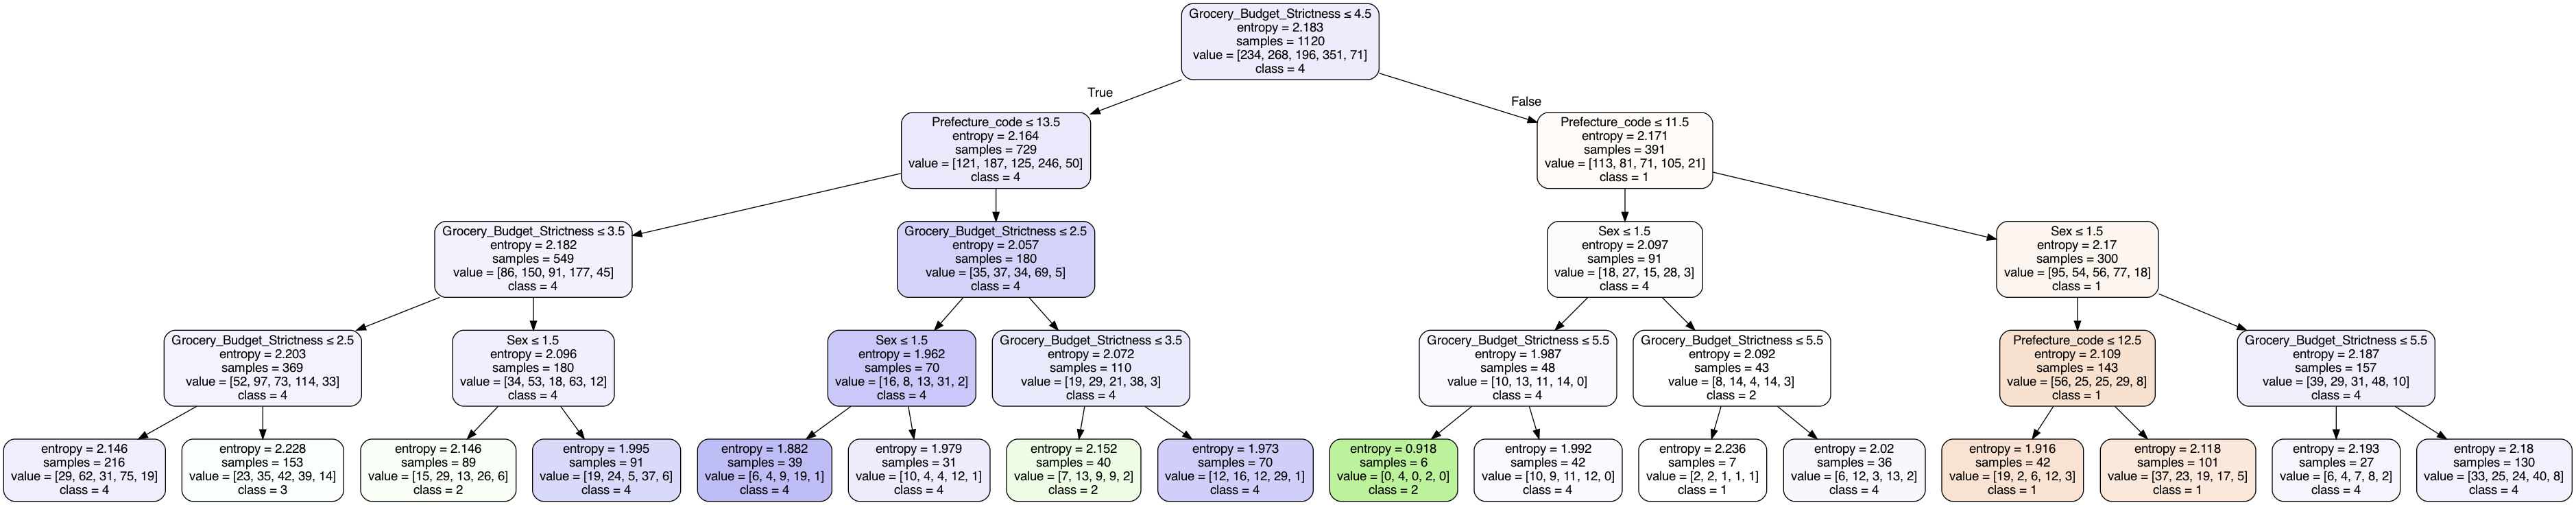

In [208]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols_Farming,class_names=['1','2','3','4','5'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('farming_dct.png')
Image(graph.create_png())